In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from streak_finder import Structure, Image, DetState, find_streaks, region_grow, grow_step, generate_line, distance_to_line
from tests.test_streak_finder import generate_image

In [6]:
struct = Structure.new(3, 2)
image = Image.new(generate_image(500, 500, 100, 50, 3), struct)
state = DetState.new_sparse(image)

In [7]:
result = find_streaks(image, state, xtol=1.1, lookahead=1, min_size=3)

Detecting lines: 0 checked [00:00, ?it/s]

In [9]:
lines = np.array([[line.bounds.x0, line.bounds.y0, line.bounds.x1, line.bounds.y1]
                    for line in result.lines])
np.max(lines, axis=0)

array([498.21891497, 495.82615629, 499.51036107, 498.88186922])

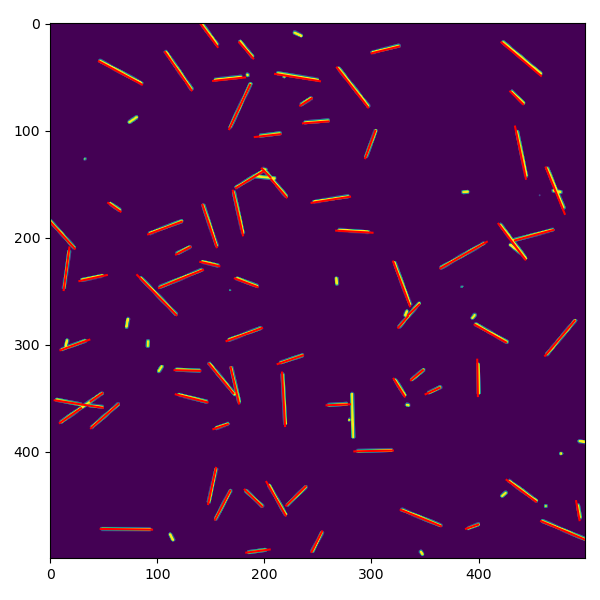

In [5]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image.data[()])
# ax.scatter(state.x, state.y, c='r')
for line in result.lines:
    ax.plot([line.bounds.x0, line.bounds.x1], [line.bounds.y0, line.bounds.y1], c='r')

fig.tight_layout()
plt.show()